### 特征选择-低方差过滤法

方差阈值***VarianceThreshold*** 是特征选择的一种简单的基本方法。它删除了所有方差不满足某些阈值的特征。默认情况下，它删除所有零方差特征，即在所有样本中具有相同值的特征。

In [4]:
from sklearn.feature_selection import VarianceThreshold
# 删除低方差特征，方差低于0.01的特征将被移除
x = [[0, 2, 0, 3],
     [0, 1, 4, 3],
     [0, 2, 0, 3],
     [0, 1, 4, 3]]
var_thresh = VarianceThreshold(threshold=0.1) 
X_filtered = var_thresh.fit_transform(x)
print(X_filtered)  # 输出移除低方差特征后的数据集

[[2 0]
 [1 4]
 [2 0]
 [1 4]]


In [7]:
import numpy as np

A = np.random.randn(5, 5)
print("Original Array:\n", A)
print(np.var(A, axis=0))  # 计算每一列的方差

B = np.copy(A)
var_thresh = VarianceThreshold(threshold=0.8)
B_filtered = var_thresh.fit_transform(B)
print("Filtered Array:\n", B_filtered)

Original Array:
 [[ 1.97435408  0.79210691  0.3196005  -0.50985229 -0.03661263]
 [-1.15756229  1.07710921  0.32190575  0.63847866 -0.67290923]
 [-0.41621714 -0.97391781  0.79760689 -0.68264775 -0.28838474]
 [ 0.52619196 -0.17979592  1.8543578   0.38120948  0.65679525]
 [ 0.43857684 -1.40090573 -0.37462745  0.03947643 -1.46012873]]
[1.10153125 0.92740428 0.54340074 0.25538714 0.49035516]
Filtered Array:
 [[ 1.97435408  0.79210691]
 [-1.15756229  1.07710921]
 [-0.41621714 -0.97391781]
 [ 0.52619196 -0.17979592]
 [ 0.43857684 -1.40090573]]


In [19]:
a = np.random.randn(100)
print(np.var(a))
b = np.random.normal(5, 0.1, size=100)
print(np.var(b))
c = np.vstack([a,b]).T
print(c.shape)
var_thresh = VarianceThreshold(0.04)
d = var_thresh.fit_transform(np.copy(c))
print(d.shape)

0.8357800781004994
0.01116808998734403
(100, 2)
(100, 1)


### 特征工程-相关系数法

In [23]:
import pandas as pd

X = [[5],[8],[10],[12],[15],[3],[7],[9],[14],[6]]
y = [55, 65, 70, 75, 85, 50, 60, 72, 80, 58]
# 计算皮尔逊相关系数
x = pd.DataFrame(X)
y = pd.Series(y)
# print(x.shape,y.shape)
print(x.corrwith(y, method='pearson'))

# 计算斯皮尔曼相关系数
print(x.corrwith(y, method='spearman'))


0    0.987044
dtype: float64
0    0.987879
dtype: float64


### 特征降维-主成分分析（PCA）

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 生成数据
x = np.random.randn(1000,3)
print(x.shape)

(1000, 3)


In [26]:
# 使用PCA进行降维
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
print(x_pca.shape)

(1000, 2)


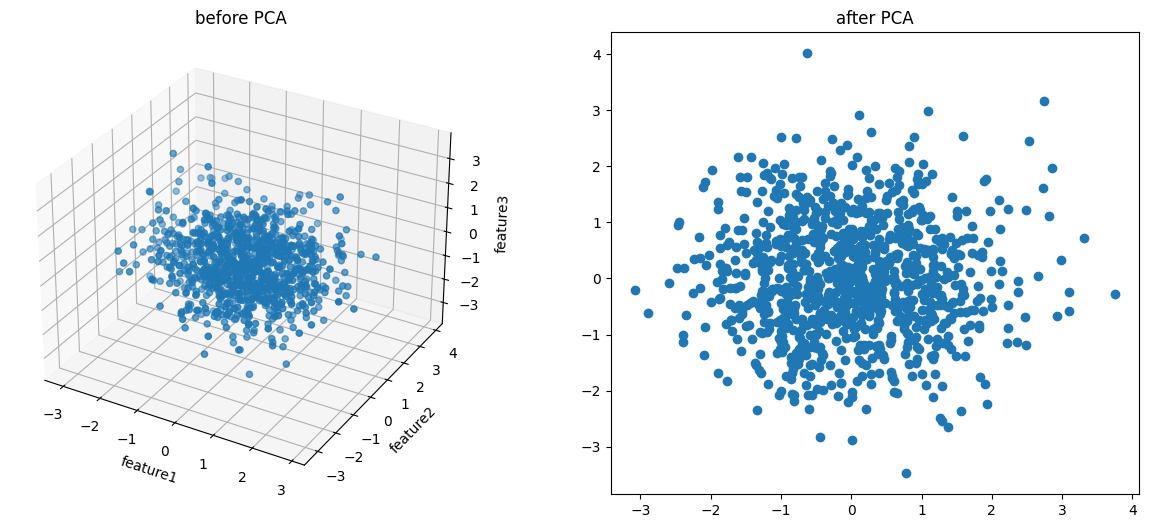

In [31]:
# 三维数据可视化
flg = plt.figure(figsize=(15, 6))
ax1 = flg.add_subplot(121, projection='3d')
ax1.scatter(x[:,0],x[:,1],x[:,2])
ax1.set_title('before PCA')
ax1.set_xlabel('feature1')
ax1.set_ylabel('feature2')
ax1.set_zlabel('feature3')

ax2 = flg.add_subplot(122)
ax2.scatter(x_pca[:,0],x_pca[:,1])
ax2.set_title('after PCA')
plt.show()

d:\admin\miniconda\envs\paoge1\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
d:\admin\miniconda\envs\paoge1\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


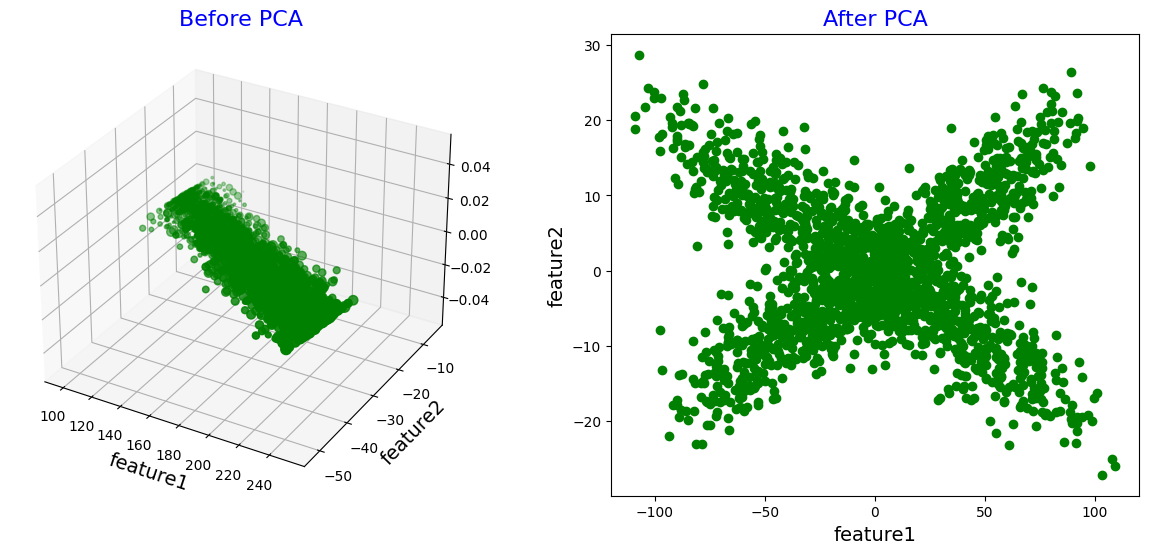

In [53]:
# 构造三组线性相关的数据
x = np.random.randn(1000,3)
y = np.random.normal(2,1,(1000,3))
# np.random.seed(40)
# noise1 = np.random.randint(5,20,(1000,3))
np.random.seed(42)
noise2 = np.random.randint(20,50,(1000,3))
data_1 = x + y + 5*noise2
data_2 = 2*x + 3*y - noise2
data_3 = 9*x - 7*y + noise2
plt.figure(figsize=(15,6))
plt.subplot(121,projection='3d')
# the first graph
plt.scatter(data_1, data_2, data_3, color='green')
plt.title("Before PCA",color='blue', fontsize=16)
plt.xlabel('feature1',fontsize=14)
plt.ylabel('feature2', fontsize=14)
# the second graph
plt.subplot(122)
pca = PCA(n_components=2)
data1_pca = pca.fit_transform(data_1)
data2_pca = pca.fit_transform(data_2)
plt.scatter(data1_pca, data2_pca, color='green')
plt.title("After PCA",color='blue', fontsize=16)
plt.xlabel('feature1',fontsize=14)
plt.ylabel('feature2', fontsize=14)
plt.show()